In [1]:
# Import the needed library

import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

# Data Preparations Part --

In [2]:
# Importing the dataset (Source: DQLab.id - Data Analyst Python Track Certification)

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

print("# of Data Records:", df.shape[0])

df.head()

# of Data Records: 100000


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [4]:
# Change data in 'First_Transaction' and 'Last_Transaction' to Datetime format

# First_Transaction Column:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'], unit='ms', origin='unix')

# Last_Transaction Column:
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'], unit='ms', origin='unix')

df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25


In [5]:
# Checking the maximum transaction date and define the target variable 'Churn' to dataset

latest_date_transaction = max(df['Last_Transaction'])
print("The latest Transaction Date occured at:",latest_date_transaction)

# Classify the Churn Costumer:
# In this case, customers who have latest transaction before at 6 month before to the current latest_date_transaction will be considered as 'Churned' Customer

six_months_before_latest_date = latest_date_transaction - relativedelta(months = 6)
print("Customers who have latest transaction date before this date:",six_months_before_latest_date,
      "will be considered as 'Churned'")

df.loc[df['Last_Transaction']<= six_months_before_latest_date, 'Churn'] = 'Yes' 
df.loc[df['Last_Transaction']> six_months_before_latest_date, 'Churn'] = 'No'

df.head()

The latest Transaction Date occured at: 2019-02-01 23:57:57.286000
Customers who have latest transaction date before this date: 2018-08-01 23:57:57.286000 will be considered as 'Churned'


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,No
1,2,2,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,No
2,3,3,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,No
3,4,4,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,No
4,5,5,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,No


In [6]:
# Take out the unnecessary columns for training model

del df['no']
del df['Row_Num']

df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608,1467681,22,No
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270,1269337,41,No
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000,310915,30,No
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911,722632,27,No
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.530,1775036,25,No


# Data Analysis Part --

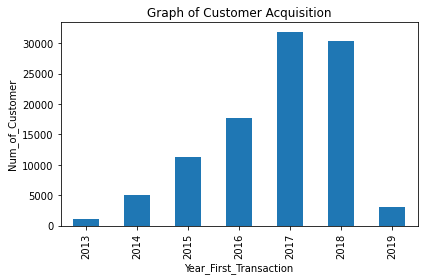

In [7]:
import matplotlib.pyplot as plt

# Extract 'Year'-component from first and last transactions into 2 new columns:

df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

# Plot graph of customer acquisition by Year

df_year_1 = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year_1.plot(x='index', y='value', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

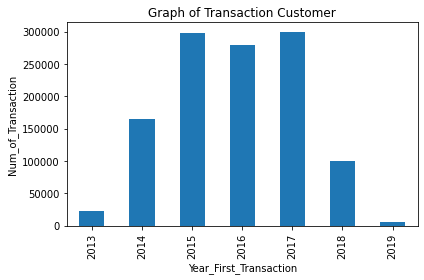

In [8]:
# Make graph of number of transactions occured by Year

plt.clf()
df_year_2 = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year_2.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

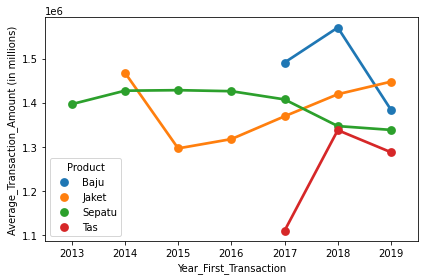

In [9]:
# Make graph of average of transactions occured by Year and Products

import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
x='Year_First_Transaction',
y='Average_Transaction_Amount',
hue='Product')
plt.ylabel('Average_Transaction_Amount (in millions)')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

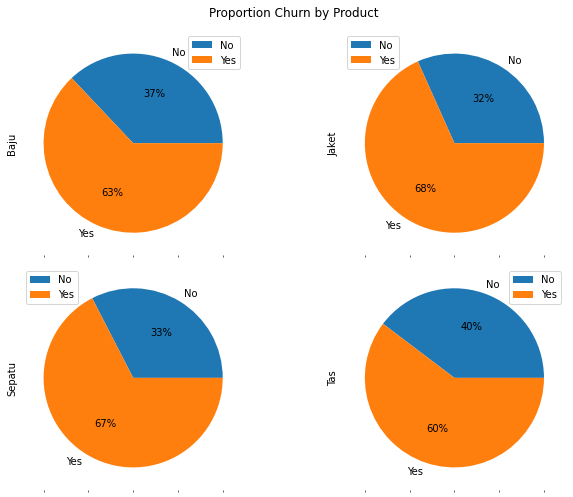

In [10]:
# Pivoting the Churn Customers by All Products

df_piv = df.pivot_table(index='Churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# Make the Pie Chart of the Pivot Table above

plt.clf()
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()


# Building & Apply Predictive Model (start from here) --

In [11]:
# Counting overall Label compositions:

print("Total of All Customers", df.shape[0])
print("Total of Churned Customers", df.loc[df.Churn == 'Yes'].shape[0])
print("Natural Churn-rate:", (df.loc[df.Churn == 'Yes'].shape[0]/df.shape[0])*100,"%")

# The dataset's label is quite well-balanced between Churned and Non-Churned Customers (IDEAL RATIO is 1:1)

Total of All Customers 100000
Total of Churned Customers 66701
Natural Churn-rate: 66.701 %


In [12]:
# Import the Machine Learing's Library scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [13]:
# Define new dataset with needed columns for training model using -- Feature Engineering --

# Make Date Difference Between the latest_date_transaction with First & Last Transaction Date columns:
df['Diff_First_to_Latest_Date'] = (latest_date_transaction - df['First_Transaction']).dt.days.astype(int)
df['Diff_Last_to_Latest_Date'] = (latest_date_transaction - df['Last_Transaction']).dt.days.astype(int)

data = df[['Diff_First_to_Latest_Date', 'Diff_Last_to_Latest_Date', 'Product', 'Average_Transaction_Amount', 
           'Count_Transaction', 'Churn']]

# Apply LabelEncoding to categorical-data:

Product_Label = LabelEncoder()

data['Product'] = Product_Label.fit_transform(data['Product'])

data["Churn"].replace({"Yes": True, "No": False}, inplace=True)

data.head()

C:\Users\KEVINN~1\AppData\Local\Temp/ipykernel_15916/354797818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Product'] = Product_Label.fit_transform(data['Product'])
c:\users\kevin nugraha\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Diff_First_to_Latest_Date,Diff_Last_to_Latest_Date,Product,Average_Transaction_Amount,Count_Transaction,Churn
0,957,119,1,1467681,22,False
1,1654,38,2,1269337,41,False
2,644,8,3,310915,30,False
3,644,16,1,722632,27,False
4,1387,71,2,1775036,25,False


In [14]:
# Split the datasets into train and test data:

X = data.drop(['Churn'], axis=1)  # PREDICTORS
y = data['Churn']                 # LABEL

seed = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

print('The X_Train size:', X_train.shape)
print('The X_Test size:', X_test.shape)

print('\nThe y_Train size:', y_train.shape,'with the distribution of YES is:',
      (y_train.loc[y_train == True].shape[0]/y_train.shape[0])*100,'%')

print('The y_Test size:', y_test.shape,'with the distribution of YES is:',
      (y_test.loc[y_test == True].shape[0]/y_test.shape[0])*100,'%')

The X_Train size: (75000, 5)
The X_Test size: (25000, 5)

The y_Train size: (75000,) with the distribution of YES is: 66.74 %
The y_Test size: (25000,) with the distribution of YES is: 66.584 %


In [15]:
# Create the predictive model & train the dataset:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model successfully created!")

Model successfully created!


==== The Importance Feature of The Model ====

                  Features    Importance
  Diff_Last_to_Latest_Date  1.334782e-02
Average_Transaction_Amount -5.696774e-07
 Diff_First_to_Latest_Date -1.294489e-03
                   Product -9.921814e-03
         Count_Transaction -3.148073e-02

==== The Plot of Features Importances/Coefficients ====


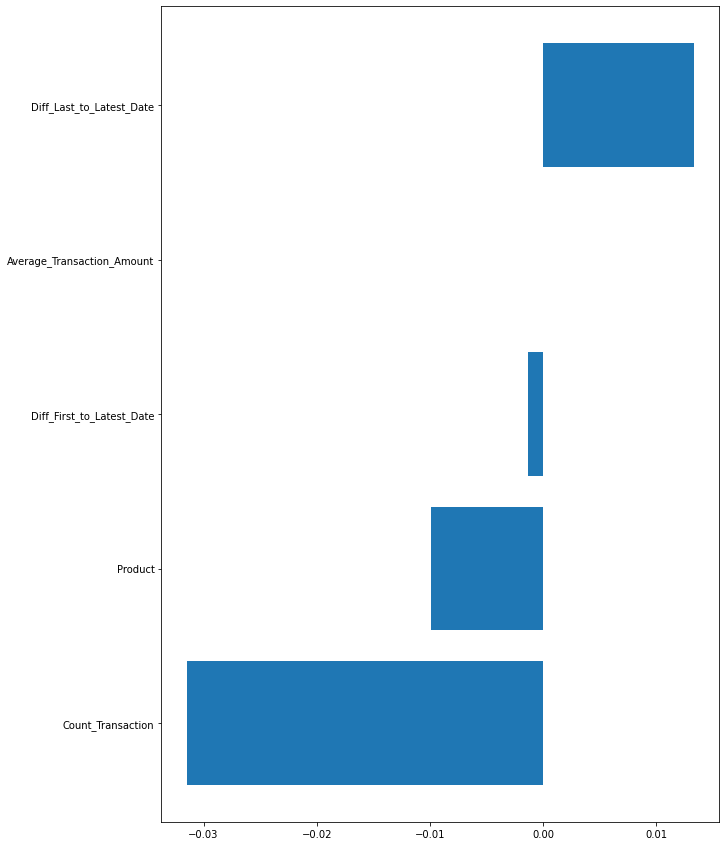

In [16]:
# Predictor/Feature Importance for Each Variable

import math

print('==== The Importance Feature of The Model ====\n')

importance = model.coef_
importance_v2 = importance.tolist()[0]

columns_list = X_train.columns.values

importance_df = pd.DataFrame()
importance_df['Features'] = columns_list
importance_df['Importance'] = importance_v2
importance_df.sort_values(by=['Importance'], ascending=True, inplace=True)

# summarize feature importance

print(importance_df.sort_values(by=['Importance'], ascending=False).to_string(index=False))

print("=====================================================\n\n==== The Plot of Features Importances/Coefficients ====")

plt.figure(figsize=(10,15))
plt.barh(importance_df['Features'], importance_df['Importance'])
plt.show()

In [17]:
# Modelling Performance Results:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.69      0.79      8354
        True       0.86      0.97      0.92     16646

    accuracy                           0.88     25000
   macro avg       0.90      0.83      0.85     25000
weighted avg       0.89      0.88      0.87     25000



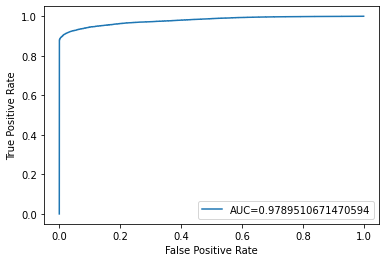

In [18]:
# Create ROC curve and AUC:

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# End
<b>Conclusion</b>: According to the predictive-model's interpretations, the most important variable that determine the customers to <u>not churning</u> is the "Count_Transaction" or we can say <i>the more frequent a customer doing transactions, that customer will less likely going to churn</i>.